# General libraries

In [170]:
import os
import matplotlib.image as mpimage
import matplotlib.pyplot as plt
import numpy as np
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import skimage.io as io
import pylab

# Setup

In [171]:
# Task annotations
split = 'val'
year = '2017'
splityear = split + year
ann_data_dir = '../coco/annotations'
ann_data_name = '{}.json'.format(splityear)
ann_data_file = '{}/{}'.format(ann_data_dir, ann_data_name)
# Stuff masks
stuff_masks_source = 'deeplab-pytorch/data/out'
masks_dir = '{}/{}'.format(stuff_masks_source, splityear)
# Detection results
res_data_dir = 'Detectron.pytorch/data'
res_data_file='{}/out/{}/segmentations_coco_{}_{}_results.json'.format(res_data_dir, splityear, year, split)
# Coco
coco = COCO(ann_data_file)
coco_res = coco.loadRes(res_data_file)

loading annotations into memory...
Done (t=0.39s)
creating index...
index created!
Loading and preparing results...
DONE (t=3.77s)
creating index...
index created!


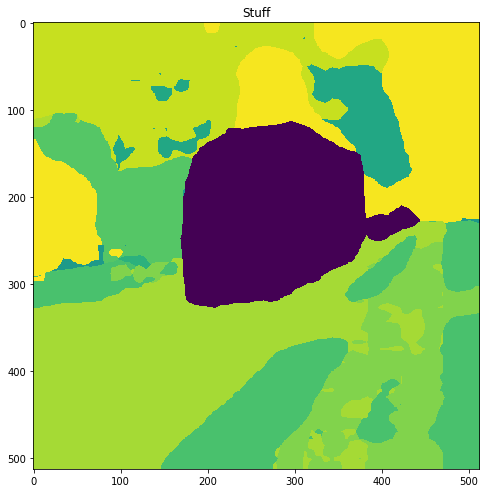

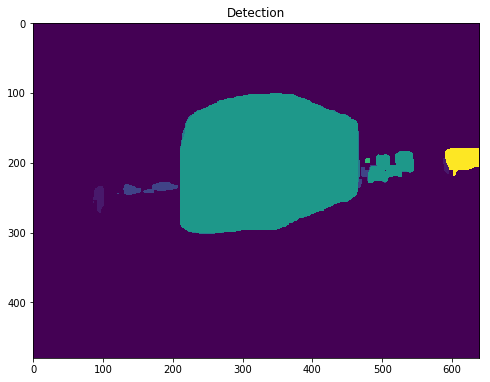

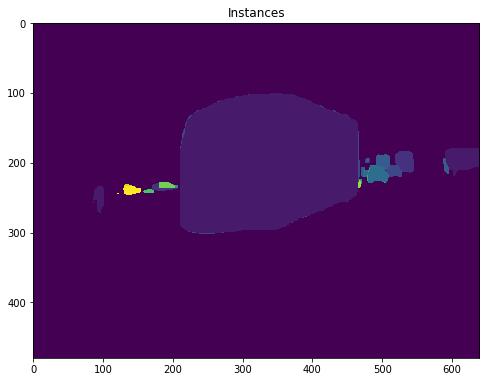

In [172]:
import panopticutils.ann_merger as merger
ids = coco.getImgIds()
img_id = [np.random.choice(ids)]
img_info = coco.loadImgs(img_id)
img_file_name = os.path.splitext(img_info[0]['file_name'])[0]
stuff_mask = merger.load_mask_png(img_file_name, masks_dir)
merger.show_mask(stuff_mask, 'Stuff')
detection_mask = merger.load_mask_ann(img_id, coco_res)
merger.show_mask(detection_mask, 'Detection')
instance_mask = merger.create_instance_mask(img_id, coco_res)
merger.show_mask(instance_mask, 'Instances')

Changed 95 into 197.
Changed 96 into 184.
Changed 105 into 187.
Changed 112 into 185.
Changed 123 into 193.
Changed 139 into 191.
Changed 156 into 187.
Changed 168 into 184.


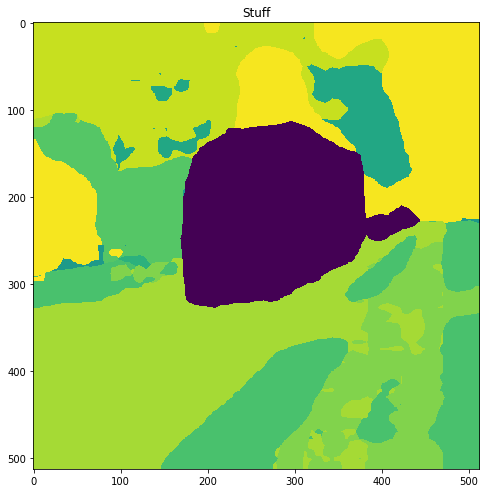

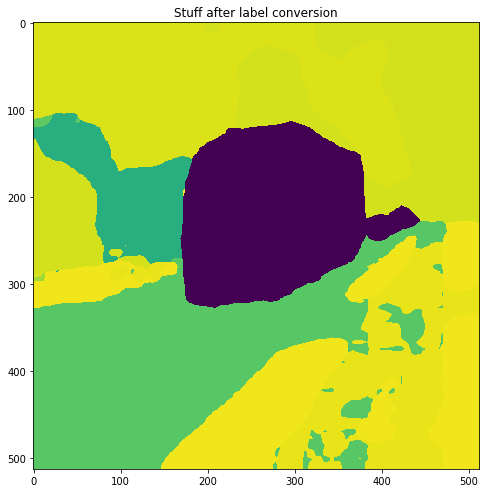

In [174]:
import panopticutils.label_converter as label_converter
path_to_merged_stuff_labels = "panopticutils/merged_stuff_labels.json"
path_to_panoptic_labels = "panopticapi/panoptic_coco_categories.json"
path_to_stuff_labels = "deeplab-pytorch/data/datasets/cocostuff/labels_2.txt"
id_merged = label_converter.get_dict_id_stuff_to_panoptic(path_to_merged_stuff_labels, path_to_stuff_labels, path_to_panoptic_labels)
converted = label_converter.convert(stuff_mask, id_merged)
converted = label_converter.convert_void_id()
for el in np.unique(stuff_mask):
    if el in id_merged:
        v = id_merged[el]
        print('Changed {} into {}.'.format(el, v))
merger.show_mask(stuff_mask, 'Stuff')
merger.show_mask(converted, 'Stuff after label conversion')

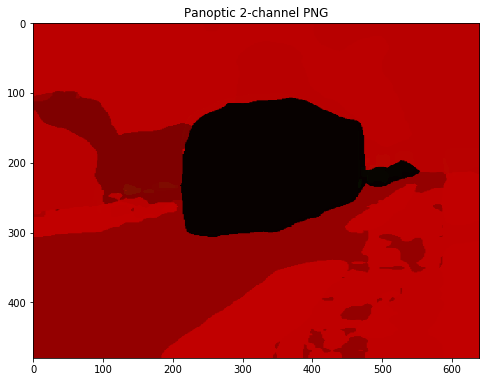

In [176]:
import panopticutils.ann_merger as merger
panoptic_2ch_png = merger.merge_stuff_instance(converted, instance_mask, instance_mask.shape)
merger.show_mask(panoptic_2ch_png, 'Panoptic 2-channel PNG')